In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

# ============================================================
# CONFIGURACIÓN GLOBAL PARA IMPRESIÓN EN BLANCO Y NEGRO
# ============================================================
def set_bw_style():
    plt.style.use('grayscale')
    plt.rcParams.update({
        'axes.edgecolor': 'black',
        'axes.labelcolor': 'black',
        'xtick.color': 'black',
        'ytick.color': 'black',
        'font.size': 11,
        'font.family': 'DejaVu Sans',
        'legend.frameon': False,
        'lines.linewidth': 1.8,
        'grid.alpha': 0.3
    })

set_bw_style()
os.environ["OMP_NUM_THREADS"] = "2"


In [49]:
# ============================================================
# 1. Generar datos sintéticos
# ============================================================
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=8,
    n_redundant=12,
    n_clusters_per_class=1,
    random_state=42
)

feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dimensiones originales: {X.shape}")
print(f"Número de clases: {len(np.unique(y))}")
df.head()


Dimensiones originales: (1000, 20)
Número de clases: 2


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,target
0,-0.372890,-0.531249,-0.382512,1.599556,-0.457833,-0.075708,-0.516284,1.575809,0.249535,-0.811486,...,-0.833955,1.183160,0.293968,0.007142,-1.006504,0.718489,0.910353,-1.248834,0.234742,1
1,0.328561,-0.742269,-1.603821,2.778860,0.478098,-0.845516,-0.002666,-0.119692,-1.209971,-0.525823,...,-0.255877,-0.760905,0.512515,0.800869,-1.699814,3.092263,1.076775,-0.687611,1.122356,1
2,-2.576696,0.244095,0.555497,-6.268923,0.335377,-2.022527,3.791584,-8.347181,-3.902871,3.092189,...,6.610188,-1.722734,-0.754974,4.191869,1.206101,1.113620,-3.271902,0.183256,-0.400870,0
3,-2.450820,-1.243827,-0.403465,-2.308740,-0.432639,-0.719051,1.155005,-1.171631,-2.891607,0.419320,...,2.704928,2.018026,-1.469510,3.010118,-0.633460,1.417068,0.492017,-2.259712,0.712482,0
4,-5.351858,0.916981,2.546529,-6.277825,-2.576617,-1.037096,2.683049,-9.344891,-1.507851,2.968565,...,8.207166,-1.767424,-0.491071,0.469800,1.091031,1.143568,-4.788792,-1.318739,-2.316068,0


In [51]:
# ============================================================
# 2. Estandarización
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Escalado completado. Primeras 3 filas:")
pd.DataFrame(X_scaled, columns=feature_names).head(3)


Escalado completado. Primeras 3 filas:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,0.165379,0.005933,-0.008491,0.774519,-0.224031,0.569014,-0.957454,0.689328,0.369672,-0.458425,-0.205188,-0.418782,0.100971,0.181182,-0.985774,-0.550174,0.195724,0.522509,-0.157383,0.055322
1,0.412677,-0.078659,-0.383676,1.094564,0.250901,0.049850,-0.636905,0.215810,-0.189146,-0.303518,-1.071450,-0.261419,-1.021231,0.299017,-0.555161,-0.933711,1.083732,0.607056,0.129797,0.523026
2,-0.611577,0.316743,0.279665,-1.360866,0.178478,-0.743935,1.731085,-2.081955,-1.220208,1.658432,-0.035620,1.607642,-1.576443,-0.384383,1.284525,0.673834,0.343539,-1.602185,0.575424,-0.279597


In [53]:
# ============================================================
# 3. PCA completo
# ============================================================
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("\n=== EXPLAINED VARIANCE RATIO POR COMPONENTE ===")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")



=== EXPLAINED VARIANCE RATIO POR COMPONENTE ===
PC1: 0.3455 (34.55%)
PC2: 0.2032 (20.32%)
PC3: 0.1517 (15.17%)
PC4: 0.1183 (11.83%)
PC5: 0.1085 (10.85%)
PC6: 0.0512 (5.12%)
PC7: 0.0180 (1.80%)
PC8: 0.0036 (0.36%)
PC9: 0.0000 (0.00%)
PC10: 0.0000 (0.00%)


In [55]:
# ============================================================
# 4. Varianza acumulada
# ============================================================
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nComponentes necesarios para 95% de varianza: {n_components_95}")



Componentes necesarios para 95% de varianza: 6


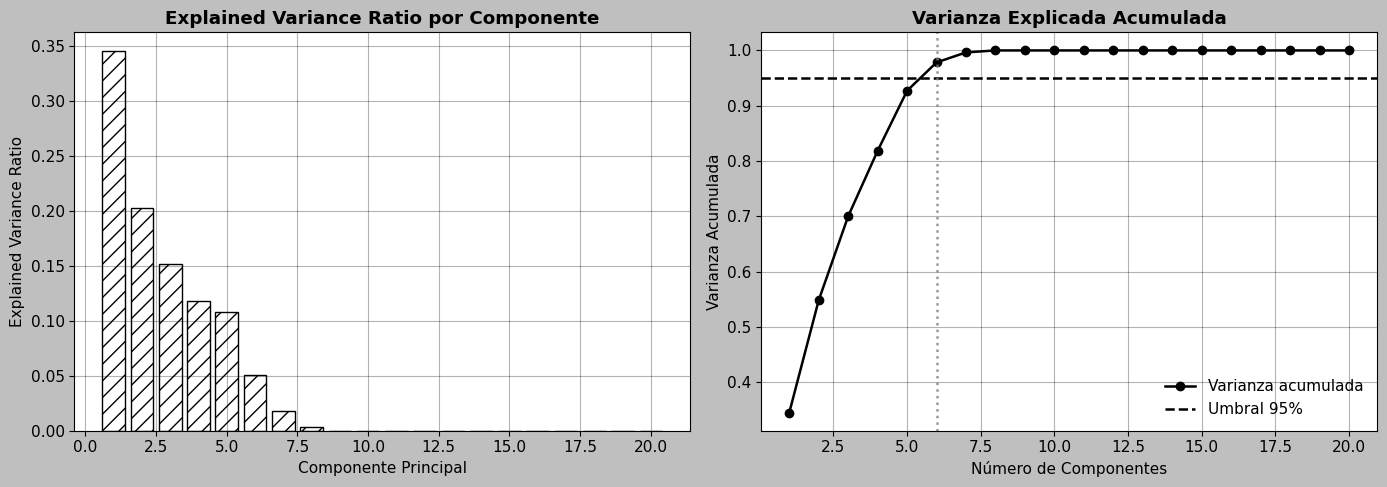

In [57]:
# ============================================================
# 5. Visualizaciones optimizadas para B/N
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Gráfico 1: Explained Variance Ratio
axes[0].bar(range(1, len(explained_variance_ratio) + 1),
            explained_variance_ratio,
            color='white', edgecolor='black', hatch='//')
axes[0].set_title('Explained Variance Ratio por Componente', fontweight='bold')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True, alpha=0.3)

# --- Gráfico 2: Varianza acumulada
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1),
             cumulative_variance_ratio, 'o-', color='black', label='Varianza acumulada')
axes[1].axhline(y=0.95, color='black', linestyle='--', label='Umbral 95%')
axes[1].axvline(x=n_components_95, color='gray', linestyle=':', alpha=0.8)
axes[1].set_title('Varianza Explicada Acumulada', fontweight='bold')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Acumulada')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [59]:
# ============================================================
# 6. Comparación de modelos
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo original
model_original = LogisticRegression(random_state=42, max_iter=1000)
model_original.fit(X_train, y_train)
accuracy_original = accuracy_score(y_test, model_original.predict(X_test))

# Modelo con PCA (95%)
pca_reduced = PCA(n_components=n_components_95)
X_train_pca = pca_reduced.fit_transform(X_train)
X_test_pca = pca_reduced.transform(X_test)

model_pca = LogisticRegression(random_state=42, max_iter=1000)
model_pca.fit(X_train_pca, y_train)
accuracy_pca = accuracy_score(y_test, model_pca.predict(X_test_pca))

print("Accuracy Original:", round(accuracy_original, 3))
print("Accuracy con PCA:", round(accuracy_pca, 3))


Accuracy Original: 0.947
Accuracy con PCA: 0.933


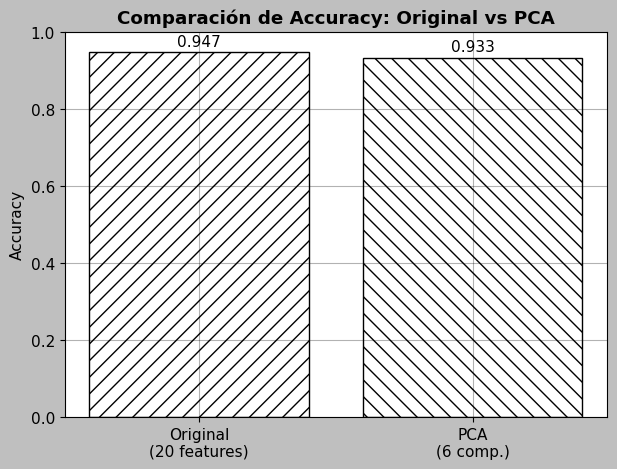

In [61]:
# ============================================================
# Gráfico 3: Comparación de Accuracy
# ============================================================
models = ['Original\n(20 features)', f'PCA\n({n_components_95} comp.)']
accuracies = [accuracy_original, accuracy_pca]
patterns = ['//', '\\\\']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(models, accuracies, color='white', edgecolor='black')
for bar, hatch in zip(bars, patterns):
    bar.set_hatch(hatch)

ax.set_title('Comparación de Accuracy: Original vs PCA', fontweight='bold')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{acc:.3f}', ha='center', va='bottom')

ax.grid(True, alpha=0.3)
plt.show()


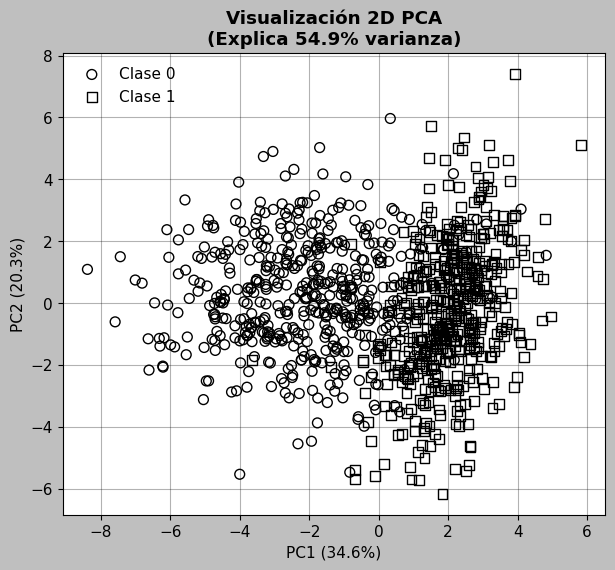

In [63]:
# ============================================================
# 7. Visualización 2D (primeros 2 componentes)
# ============================================================
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
classes = np.unique(y)
markers = ['o', 's']

fig, ax = plt.subplots(figsize=(7, 6))
for i, cls in enumerate(classes):
    mask = y == cls
    ax.scatter(X_2d[mask, 0], X_2d[mask, 1],
               facecolors='none', edgecolors='black',
               marker=markers[i % len(markers)], s=50, label=f'Clase {cls}')

ax.set_title(f'Visualización 2D PCA\n(Explica {np.sum(explained_variance_ratio[:2])*100:.1f}% varianza)',
             fontweight='bold')
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()


In [65]:
# ============================================================
# 8. Análisis y resumen
# ============================================================
print("\n=== ANÁLISIS DETALLADO ===")
print(f"Dimensiones reducidas: {X_train_pca.shape[1]} (reducción del {(1 - X_train_pca.shape[1]/X_train.shape[1])*100:.1f}%)")
print(f"Accuracy original: {accuracy_original:.4f}")
print(f"Accuracy con PCA: {accuracy_pca:.4f}")
print(f"Diferencia de accuracy: {accuracy_original - accuracy_pca:.4f}")
print(f"Varianza conservada: {np.sum(explained_variance_ratio[:n_components_95])*100:.2f}%")



=== ANÁLISIS DETALLADO ===
Dimensiones reducidas: 6 (reducción del 70.0%)
Accuracy original: 0.9467
Accuracy con PCA: 0.9333
Diferencia de accuracy: 0.0133
Varianza conservada: 97.84%


In [67]:
# ============================================================
# 9. Tabla resumen (primeros 10 componentes)
# ============================================================
summary_data = {
    'Componente': [f'PC{i+1}' for i in range(min(10, len(explained_variance_ratio)))],
    'Explained Variance Ratio': [f'{ratio:.4f}' for ratio in explained_variance_ratio[:10]],
    'Varianza Acumulada': [f'{cum:.4f}' for cum in cumulative_variance_ratio[:10]],
    'Porcentaje Acumulado': [f'{cum*100:.2f}%' for cum in cumulative_variance_ratio[:10]]
}

summary_df = pd.DataFrame(summary_data)
print("\n=== TABLA RESUMEN (Primeros 10 componentes) ===")
summary_df



=== TABLA RESUMEN (Primeros 10 componentes) ===


,Componente,Explained Variance Ratio,Varianza Acumulada,Porcentaje Acumulado
0,PC1,0.3455,0.3455,34.55%
1,PC2,0.2032,0.5487,54.87%
2,PC3,0.1517,0.7004,70.04%
3,PC4,0.1183,0.8187,81.87%
4,PC5,0.1085,0.9272,92.72%
5,PC6,0.0512,0.9784,97.84%
6,PC7,0.0180,0.9964,99.64%
7,PC8,0.0036,1.0000,100.00%
8,PC9,0.0000,1.0000,100.00%
9,PC10,0.0000,1.0000,100.00%
